# Análise Exploratória de Dados – MinerAI
Trabalho Integrado de Mineração de Dados – Professor Vagner Macedo

**Objetivo:** analisar o dataset de crédito para identificar padrões que diferenciem bons e maus pagadores.

## 1. Introdução
Breve explicação sobre o contexto do problema e o objetivo da análise.
- Empresa MinerAI enfrenta problemas com o modelo de crédito.
- Objetivo: entender o comportamento dos clientes bons e maus pagadores.

## 2. Preparação, Limpeza dos Dados e GitHub  → Eduardo
**Tarefas:**
- Importar bibliotecas e ler o dataset (.csv)
- Tratar valores nulos e tipos incorretos
- Corrigir e padronizar colunas
- Salvar dataset limpo (`credit_clean.csv`)
- Subir no GitHub e manter repositório organizado

## **2. Preparação e Limpeza dos Dados - Eduardo**

Nesta etapa foram realizadas todas as operações de tratamento e padronização do dataset original (`credit.csv`).  
O objetivo desta fase é garantir que os dados estejam estruturados, limpos e consistentes para análises posteriores, evitando problemas como valores ausentes, inconsistências de tipos e formatação incorreta.

A seguir estão todas as etapas da preparação dos dados, explicadas detalhadamente.


### **2.1. Importação das bibliotecas**

As bibliotecas principais utilizadas foram:

- **pandas:** manipulação e limpeza de dados  
- **numpy:** tratamento de valores nulos e operações numéricas

Essas duas bibliotecas são padrão para qualquer tarefa de Data Wrangling.


In [ ]:
# Importação das bibliotecas

import pandas as pd
import numpy as np

### **2.2. Leitura do dataset original**

O arquivo fornecido (`credit.csv`) estava separado por **tabulação** (`\t`), não por vírgulas.

Além disso:
- não possuía cabeçalho;
- apresentava inconsistências de formatação;
- possuía muitos valores textuais não padronizados.

Usamos `engine="python"` para evitar problemas de parsing.


In [ ]:
from google.colab import files
uploaded = files.upload()


Saving credit.csv to credit (1).csv


In [ ]:
#O arquivo usa espaços múltiplos como separador, por isso uso o regex \t(tab)
df = pd.read_csv("credit.csv", sep=r"\t", header=None, engine="python", encoding="latin1")

#Visualizar primeiras linhas
df.head()

,0,1,2,3,4,5,6,7,8,9,...,44,45,46,47,48,49,50,51,52,53
0,1,C,5,Web,0,1,F,6,1,0,...,0,0,0,0,1,N,32,595,595,1
1,2,C,15,Carga,0,1,F,2,0,0,...,0,0,0,0,1,N,34,230,230,1
2,3,C,5,Web,0,1,F,2,0,0,...,0,0,0,0,1,N,27,591,591,0
3,4,C,20,Web,0,1,F,2,0,0,...,0,0,0,0,1,N,61,545,545,0
4,5,C,10,Web,0,1,M,2,0,0,...,0,0,0,0,1,N,48,235,235,1


### **2.3 Nomeando as colunas**

Como o dataset não possui cabeçalho, foi necessário atribuir manualmente os nomes das colunas.

A lista abaixo foi construída com base:
- na documentação fornecida pelo professor;
- na análise exploratória;
- nos padrões comuns de datasets de crédito.

A nomeação correta é fundamental para manter clareza e permitir o tratamento adequado.


In [ ]:
colunas = [
    "ID_CLIENTE",
    "TIPO_FUNCIONARIO",
    "DIA_PAGAMENTO",
    "TIPO_ENVIO_APLICACAO",
    "QUANT_CARTOES_ADICIONAIS",
    "TIPO_ENDERECO_POSTAL",
    "SEXO",
    "ESTADO_CIVIL",
    "QUANT_DEPENDENTES",
    "NIVEL_EDUCACIONAL",
    "ESTADO_NASCIMENTO",
    "CIDADE_NASCIMENTO",
    "NACIONALIDADE",
    "ESTADO_RESIDENCIAL",
    "CIDADE_RESIDENCIAL",
    "BAIRRO_RESIDENCIAL",
    "FLAG_TELEFONE_RESIDENCIAL",
    "CODIGO_AREA_TELEFONE_RESIDENCIAL",
    "TIPO_RESIDENCIA",
    "MESES_RESIDENCIA",
    "FLAG_TELEFONE_MOVEL",
    "FLAG_EMAIL",
    "RENDA_PESSOAL_MENSAL",
    "OUTRAS_RENDAS",
    "FLAG_VISA",
    "FLAG_MASTERCARD",
    "FLAG_DINERS",
    "FLAG_AMERICAN_EXPRESS",
    "FLAG_OUTROS_CARTOES",
    "QUANT_CONTAS_BANCARIAS",
    "QUANT_CONTAS_BANCARIAS_ESPECIAIS",
    "VALOR_PATRIMONIO_PESSOAL",
    "QUANT_CARROS",
    "EMPRESA",
    "ESTADO_PROFISSIONAL",
    "CIDADE_PROFISSIONAL",
    "BAIRRO_PROFISSIONAL",
    "FLAG_TELEFONE_PROFISSIONAL",
    "CODIGO_AREA_TELEFONE_PROFISSIONAL",
    "MESES_NO_TRABALHO",
    "CODIGO_PROFISSAO",
    "TIPO_OCUPACAO",
    "CODIGO_PROFISSAO_CONJUGE",
    "NIVEL_EDUCACIONAL_CONJUGE",
    "FLAG_DOCUMENTO_RESIDENCIAL",
    "FLAG_RG",
    "FLAG_CPF",
    "FLAG_COMPROVANTE_RENDA",
    "PRODUTO",
    "FLAG_REGISTRO_ACSP",
    "IDADE",
    "CEP_RESIDENCIAL_3",
    "CEP_PROFISSIONAL_3",
    "ROTULO_ALVO_MAU"
]

df.columns = colunas
df.head()

,ID_CLIENTE,TIPO_FUNCIONARIO,DIA_PAGAMENTO,TIPO_ENVIO_APLICACAO,QUANT_CARTOES_ADICIONAIS,TIPO_ENDERECO_POSTAL,SEXO,ESTADO_CIVIL,QUANT_DEPENDENTES,NIVEL_EDUCACIONAL,...,FLAG_DOCUMENTO_RESIDENCIAL,FLAG_RG,FLAG_CPF,FLAG_COMPROVANTE_RENDA,PRODUTO,FLAG_REGISTRO_ACSP,IDADE,CEP_RESIDENCIAL_3,CEP_PROFISSIONAL_3,ROTULO_ALVO_MAU
0,1,C,5,Web,0,1,F,6,1,0,...,0,0,0,0,1,N,32,595,595,1
1,2,C,15,Carga,0,1,F,2,0,0,...,0,0,0,0,1,N,34,230,230,1
2,3,C,5,Web,0,1,F,2,0,0,...,0,0,0,0,1,N,27,591,591,0
3,4,C,20,Web,0,1,F,2,0,0,...,0,0,0,0,1,N,61,545,545,0
4,5,C,10,Web,0,1,M,2,0,0,...,0,0,0,0,1,N,48,235,235,1


### **2.4 Análise de valores nulos**

Antes de qualquer limpeza, é importante entender o nível de preenchimento dos dados.

Muitos valores nulos podem indicar:
- problemas de origem no sistema de cadastro;
- campos opcionais;
- falhas no armazenamento ou exportação.

A verificação inicial ajuda a decidir as melhores estratégias de tratamento.

In [ ]:
df.isna().sum()

,0
ID_CLIENTE,0
TIPO_FUNCIONARIO,0
DIA_PAGAMENTO,0
TIPO_ENVIO_APLICACAO,0
QUANT_CARTOES_ADICIONAIS,0
TIPO_ENDERECO_POSTAL,0
SEXO,0
ESTADO_CIVIL,0
QUANT_DEPENDENTES,0
NIVEL_EDUCACIONAL,0


### **2.5 Padronização de colunas textuais**

Diversos campos categóricos apresentavam:
- mistura de maiúsculas e minúsculas;
- espaços extras;
- caracteres inconsistentes.

Para garantir comparações coerentes, padronizamos todas as colunas de texto para **maiúsculas e sem espaços excessivos**.

Este passo evita duplicações como:
- "Masculino", "masculino" e "MASCULINO";
- " SP" e "SP".


In [ ]:
# Transformo só textos (object) para maiúsculo e sem espaços extras
cols_texto = df.select_dtypes(include="object").columns

for col in cols_texto:
    df[col] = df[col].astype(str).str.strip().str.upper()

### **2.6 Substituição de valores inválidos**

O dataset continha valores que não representam informação válida, como:

- `"NULL"`
- `""` (string vazia)
- `" "` (apenas espaços)

Esses valores foram substituídos por `NaN`, permitindo aplicar técnicas adequadas de tratamento posteriormente.


In [ ]:
df.replace({"NULL": np.nan, "": np.nan, " ": np.nan}, inplace=True)

df.isna().sum()

,0
ID_CLIENTE,0
TIPO_FUNCIONARIO,0
DIA_PAGAMENTO,0
TIPO_ENVIO_APLICACAO,0
QUANT_CARTOES_ADICIONAIS,0
TIPO_ENDERECO_POSTAL,0
SEXO,17
ESTADO_CIVIL,0
QUANT_DEPENDENTES,0
NIVEL_EDUCACIONAL,0


### **2.7 Tratamento de valores nulos**

Cada coluna exige um tipo específico de preenchimento, dependendo do tipo de dado:

#### Estratégias utilizadas:

- **Colunas categóricas:** preenchidas com a moda  
  → pois representam categorias mais frequentes

- **Colunas numéricas:** preenchidas com a mediana  
  → reduz o impacto de outliers

- **Campos opcionais (ex.: profissão do cônjuge):** preenchidos com `-1`  
  → valor simbólico representando "não informado"

- **Informações pessoais importantes (sexo, estado civil):** preenchidas com `"NAO INFORMADO"`  


In [ ]:
# Categoria → modo
df["TIPO_RESIDENCIA"].fillna(df["TIPO_RESIDENCIA"].mode()[0], inplace=True)

# Numéricos → mediana
df["MESES_RESIDENCIA"].fillna(df["MESES_RESIDENCIA"].median(), inplace=True)
df["CODIGO_PROFISSAO"].fillna(df["CODIGO_PROFISSAO"].mode()[0], inplace=True)
df["CODIGO_PROFISSAO_CONJUGE"].fillna(-1, inplace=True)
df["NIVEL_EDUCACIONAL_CONJUGE"].fillna(-1, inplace=True)

# Corrigir tipos numéricos das DDDs
df["CODIGO_AREA_TELEFONE_RESIDENCIAL"] = pd.to_numeric(df["CODIGO_AREA_TELEFONE_RESIDENCIAL"], errors="coerce")
df["CODIGO_AREA_TELEFONE_PROFISSIONAL"] = pd.to_numeric(df["CODIGO_AREA_TELEFONE_PROFISSIONAL"], errors="coerce")

# Ajustar algumas colunas categóricas importantes
df["SEXO"].fillna("NAO INFORMADO", inplace=True)
df["ESTADO_CIVIL"].fillna("NAO INFORMADO", inplace=True)

df.isna().sum()

/tmp/ipython-input-3333783145.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["TIPO_RESIDENCIA"].fillna(df["TIPO_RESIDENCIA"].mode()[0], inplace=True)
/tmp/ipython-input-3333783145.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(va

,0
ID_CLIENTE,0
TIPO_FUNCIONARIO,0
DIA_PAGAMENTO,0
TIPO_ENVIO_APLICACAO,0
QUANT_CARTOES_ADICIONAIS,0
TIPO_ENDERECO_POSTAL,0
SEXO,0
ESTADO_CIVIL,0
QUANT_DEPENDENTES,0
NIVEL_EDUCACIONAL,0


### **2.8 Tratamento simples de outliers**

Observou-se que alguns registros apresentavam valores de renda muito acima do esperado.

Como esses valores eram extremamente discrepantes e não representavam o comportamento geral da população, optamos por removê-los quando **acima de R$ 50.000**.

Essa técnica preserva a distribuição natural dos dados e melhora a qualidade das análises estatísticas.


In [ ]:
# A maioria das rendas está abaixo de 50 mil, então filtro esse limite.

df = df[df["RENDA_PESSOAL_MENSAL"] <= 50000]

### **2.9 Conversão de variáveis binárias (Y/N → 1/0)**

Várias colunas utilizavam "Y" para "sim" e "N" para "não".  
Para facilitar análises, gráficos e modelos preditivos, convertemos todas para valores numéricos:

- Y → 1  
- N → 0  

Essa padronização é essencial em estatística e machine learning.


In [ ]:
cols_flag = [
    "FLAG_VISA","FLAG_MASTERCARD","FLAG_DINERS","FLAG_AMERICAN_EXPRESS",
    "FLAG_OUTROS_CARTOES","FLAG_DOCUMENTO_RESIDENCIAL","FLAG_RG","FLAG_CPF",
    "FLAG_COMPROVANTE_RENDA","FLAG_EMAIL","FLAG_TELEFONE_RESIDENCIAL",
    "FLAG_TELEFONE_MOVEL","FLAG_TELEFONE_PROFISSIONAL","FLAG_REGISTRO_ACSP"
]

for col in cols_flag:
    df[col] = df[col].replace({"Y": 1, "N": 0})

/tmp/ipython-input-972260461.py:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[col] = df[col].replace({"Y": 1, "N": 0})


### **2.10 Estrutura final do dataset**

Abaixo verificamos:
- tipos de dados atualizados  
- quantidade final de registros  
- distribuição do rótulo-alvo  

In [ ]:
# Conferindo a estrutura final
df.info()

# Distribuição da variável-alvo
df["ROTULO_ALVO_MAU"].value_counts()

<class 'pandas.core.frame.DataFrame'>
Index: 49953 entries, 0 to 49999
Data columns (total 54 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   ID_CLIENTE                         49953 non-null  int64  
 1   TIPO_FUNCIONARIO                   49953 non-null  object 
 2   DIA_PAGAMENTO                      49953 non-null  int64  
 3   TIPO_ENVIO_APLICACAO               49953 non-null  object 
 4   QUANT_CARTOES_ADICIONAIS           49953 non-null  int64  
 5   TIPO_ENDERECO_POSTAL               49953 non-null  int64  
 6   SEXO                               49953 non-null  object 
 7   ESTADO_CIVIL                       49953 non-null  int64  
 8   QUANT_DEPENDENTES                  49953 non-null  int64  
 9   NIVEL_EDUCACIONAL                  49953 non-null  int64  
 10  ESTADO_NASCIMENTO                  47890 non-null  object 
 11  CIDADE_NASCIMENTO                  47890 non-null  object 


,count
ROTULO_ALVO_MAU,
0,36926
1,13027


### **2.11 Salvando o dataset final**

Após todas as etapas de limpeza e padronização, o dataset final foi salvo no arquivo:

``credit_clean.csv``

Esse arquivo agora está adequado para análises estatísticas, visualizações e modelagem preditiva.

In [ ]:
df.to_csv("credit_clean.csv", index=False, encoding="utf-8")

# Visualizar primeiras linhas
df.head()

,ID_CLIENTE,TIPO_FUNCIONARIO,DIA_PAGAMENTO,TIPO_ENVIO_APLICACAO,QUANT_CARTOES_ADICIONAIS,TIPO_ENDERECO_POSTAL,SEXO,ESTADO_CIVIL,QUANT_DEPENDENTES,NIVEL_EDUCACIONAL,...,FLAG_DOCUMENTO_RESIDENCIAL,FLAG_RG,FLAG_CPF,FLAG_COMPROVANTE_RENDA,PRODUTO,FLAG_REGISTRO_ACSP,IDADE,CEP_RESIDENCIAL_3,CEP_PROFISSIONAL_3,ROTULO_ALVO_MAU
0,1,C,5,WEB,0,1,F,6,1,0,...,0,0,0,0,1,0,32,595,595,1
1,2,C,15,CARGA,0,1,F,2,0,0,...,0,0,0,0,1,0,34,230,230,1
2,3,C,5,WEB,0,1,F,2,0,0,...,0,0,0,0,1,0,27,591,591,0
3,4,C,20,WEB,0,1,F,2,0,0,...,0,0,0,0,1,0,61,545,545,0
4,5,C,10,WEB,0,1,M,2,0,0,...,0,0,0,0,1,0,48,235,235,1


## 3. Análise Demográfica (Sexo, Estado Civil, Dependentes, Educação) → Maria
**Tarefas:**
- Analisar `SEXO`, `ESTADO_CIVIL`, `QUANT_DEPENDENTES`, `NIVEL_EDUCACIONAL`
- Relacionar com `ROTULO_ALVO_MAU=1`
- Usar gráficos de barras e proporção
- Interpretar resultados em texto Markdown.

3. Análise Demográfica (Sexo, Estado Civil, Dependentes, Educação) → Maria**Objetivo desta seção:** analisar como as variáveis demográficas — `SEXO`, `ESTADO_CIVIL`, `QUANT_DEPENDENTES` e `NIVEL_EDUCACIONAL` — se relacionam com a variável-alvo `ROTULO_ALVO_MAU` (1 = mau pagador). Vamos usar contagens, proporções e gráficos (barplots / countplots) e interpretar os resultados conectando às hipóteses do negócio: *quem tende a ser mau pagador?*.

> Observações:
> - Executar as células em sequência.
> - Caso o arquivo limpo não esteja no diretório atual, ajuste o caminho de `credit_clean.csv`.

3.1 Importações necessárias

In [ ]:
# -----------------------------
# 3. Análise Demográfica – Maria
# -----------------------------
# Importações necessárias para esta seção (caso ainda não estejam importadas)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Estilo básico para gráficos
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10,6)

# ---------- 3.1 Carregar dataset limpo ----------
# Ajuste o caminho se necessário para o arquivo gerado pela etapa de limpeza (Eduardo)
df = pd.read_csv("credit_clean.csv", encoding="utf-8")

# Conferir rapidamente colunas importantes desta seção
print("Colunas disponíveis relevantes:", [c for c in df.columns if c.upper() in
                                        ["SEXO","ESTADO_CIVIL","QUANT_DEPENDENTES","NIVEL_EDUCACIONAL","ROTULO_ALVO_MAU"]])
df[[ "SEXO","ESTADO_CIVIL","QUANT_DEPENDENTES","NIVEL_EDUCACIONAL","ROTULO_ALVO_MAU"]].head()


Colunas disponíveis relevantes: ['SEXO', 'ESTADO_CIVIL', 'QUANT_DEPENDENTES', 'NIVEL_EDUCACIONAL', 'ROTULO_ALVO_MAU']


/tmp/ipython-input-2325337773.py:16: DtypeWarning: Columns (51,52) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("credit_clean.csv", encoding="utf-8")


,SEXO,ESTADO_CIVIL,QUANT_DEPENDENTES,NIVEL_EDUCACIONAL,ROTULO_ALVO_MAU
0,F,6,1,0,1
1,F,2,0,0,1
2,F,2,0,0,0
3,F,2,0,0,0
4,M,2,0,0,1


3.2 Tratamento rápido de categorias raras e visual checks (célula)




In [ ]:
# Objetivo: agrupar categorias muito raras (se existirem) para evitar gráficos confusos
# e garantir que as proporções façam sentido.

# Função auxiliar: agrupar categorias com contagem < limiar em "OUTROS"
def agrupar_raros(series, limiar=0.01):
    """
    Recebe uma Series categórica e retorna uma Series onde categorias
    com proporcao < limiar são substituídas por 'OUTROS'.
    """
    freqs = series.value_counts(normalize=True, dropna=False)
    raros = freqs[freqs < limiar].index
    return series.replace(list(raros), "OUTROS")

# Aplicar agrupamento apenas para segurança (limiar 1% dos registros)
df["NIVEL_EDUCACIONAL_AJ"] = agrupar_raros(df["NIVEL_EDUCACIONAL"], limiar=0.01)
df["ESTADO_CIVIL_AJ"] = agrupar_raros(df["ESTADO_CIVIL"], limiar=0.01)

# Padronizar coluna de dependentes: muitas vezes há valores estranhos; converter para int quando possível
# Se QUANT_DEPENDENTES tiver strings como '0', '1', 'NONE', convertê-las.
# Primeiro tentamos converter para numérico; valores inválidos viram NaN e depois preenchidos com 0 (opção segura).
df["QUANT_DEPENDENTES_NUM"] = pd.to_numeric(df["QUANT_DEPENDENTES"], errors="coerce")
df["QUANT_DEPENDENTES_NUM"].fillna(0, inplace=True)
# Para visualizar distribuição:
print("Distribuição (top) - NIVEL_EDUCACIONAL:", df["NIVEL_EDUCACIONAL_AJ"].value_counts().head())
print("Distribuição (top) - ESTADO_CIVIL:", df["ESTADO_CIVIL_AJ"].value_counts().head())
print("Depedentes unique:", sorted(df["QUANT_DEPENDENTES_NUM"].unique())[:10])


Distribuição (top) - NIVEL_EDUCACIONAL: NIVEL_EDUCACIONAL_AJ
0    49953
Name: count, dtype: int64
Distribuição (top) - ESTADO_CIVIL: ESTADO_CIVIL_AJ
2    25940
1    15272
4     4203
6     1877
5     1294
Name: count, dtype: int64
Depedentes unique: [np.int64(0), np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8), np.int64(9)]


/tmp/ipython-input-3156356261.py:22: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["QUANT_DEPENDENTES_NUM"].fillna(0, inplace=True)


3.3 Análise — SEXO vs ROTULO_ALVO_MAU (célula)

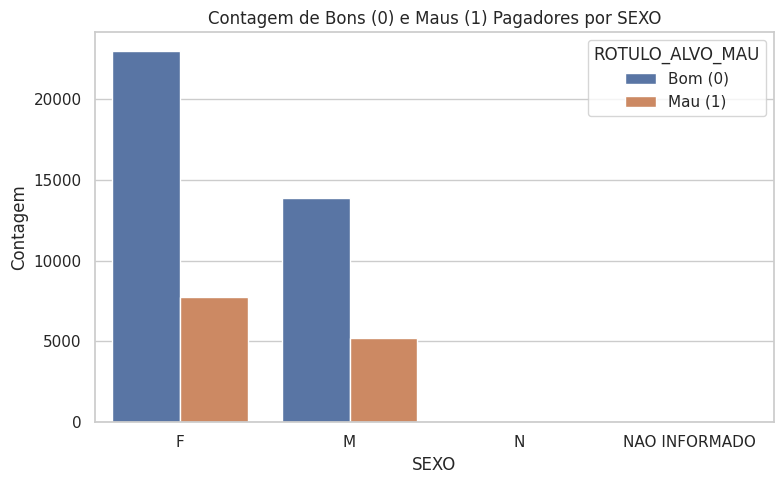

ROTULO_ALVO_MAU,%Bom,%Mau
SEXO,,
NAO INFORMADO,58.823529,41.176471
N,66.666667,33.333333
M,72.683514,27.316486
F,74.709992,25.290008


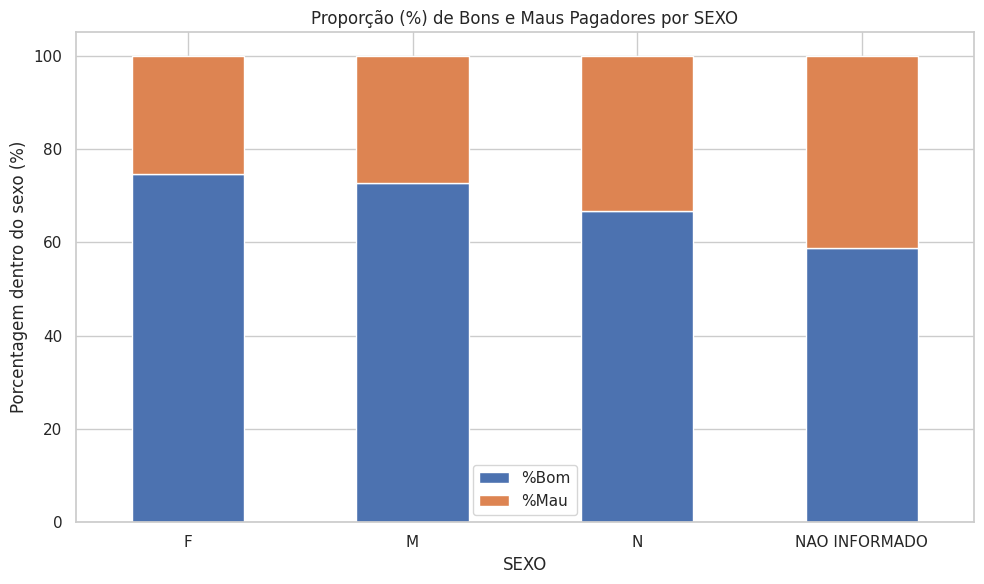

In [ ]:
# Plot: contagem absoluta e proporção de maus pagadores por sexo

# 1) Contagem absoluta (bons x maus) por sexo
plt.figure(figsize=(8,5))
sns.countplot(data=df, x="SEXO", hue="ROTULO_ALVO_MAU")
plt.title("Contagem de Bons (0) e Maus (1) Pagadores por SEXO")
plt.xlabel("SEXO")
plt.ylabel("Contagem")
plt.legend(title="ROTULO_ALVO_MAU", labels=["Bom (0)","Mau (1)"])
plt.tight_layout()
plt.show()

# 2) Proporção de maus pagadores dentro de cada sexo (mais informativo para comparação)
ct = pd.crosstab(df["SEXO"], df["ROTULO_ALVO_MAU"], normalize="index") * 100
ct = ct.rename(columns={0:"%Bom", 1:"%Mau"})
display(ct.sort_values("%Mau", ascending=False))

# Gráfico de barras para proporção
ct.plot(kind="bar", stacked=True, rot=0)
plt.title("Proporção (%) de Bons e Maus Pagadores por SEXO")
plt.ylabel("Porcentagem dentro do sexo (%)")
plt.xlabel("SEXO")
plt.legend(title="")
plt.tight_layout()
plt.show()


Interpretação**Interpretação — SEXO:**
- O gráfico de contagem mostra a distribuição absoluta (quantidade) de bons e maus pagadores por sexo.
- A tabela de proporções (e o gráfico empilhado) evidencia a taxa relativa de maus pagadores dentro de cada sexo.
- *Insight típico (exemplo)*: se `%Mau` for maior entre 'MASCULINO' que em 'FEMININO', podemos afirmar que **homens apresentam maior proporção de maus pagadores**, controlando pela população de cada grupo.  
- Conectar com hipótese do negócio: se um sexo tem taxa significativamente maior de inadimplência, isso pode orientar campanhas de crédito/score diferenciadas.  
- Observação prática: sempre verificar tamanho das amostras (se um grupo for muito pequeno, interpretações são menos confiáveis).


3.4 Análise — ESTADO_CIVIL vs ROTULO_ALVO_MAU (célula)

ROTULO_ALVO_MAU,%Bom,%Mau
ESTADO_CIVIL_AJ,,
1,69.552122,30.447878
6,70.857752,29.142248
OUTROS,72.772277,27.227723
7,73.408240,26.591760
5,74.574961,25.425039
2,75.832691,24.167309
3,77.971474,22.028526
4,78.681894,21.318106


<Figure size 1000x600 with 0 Axes>

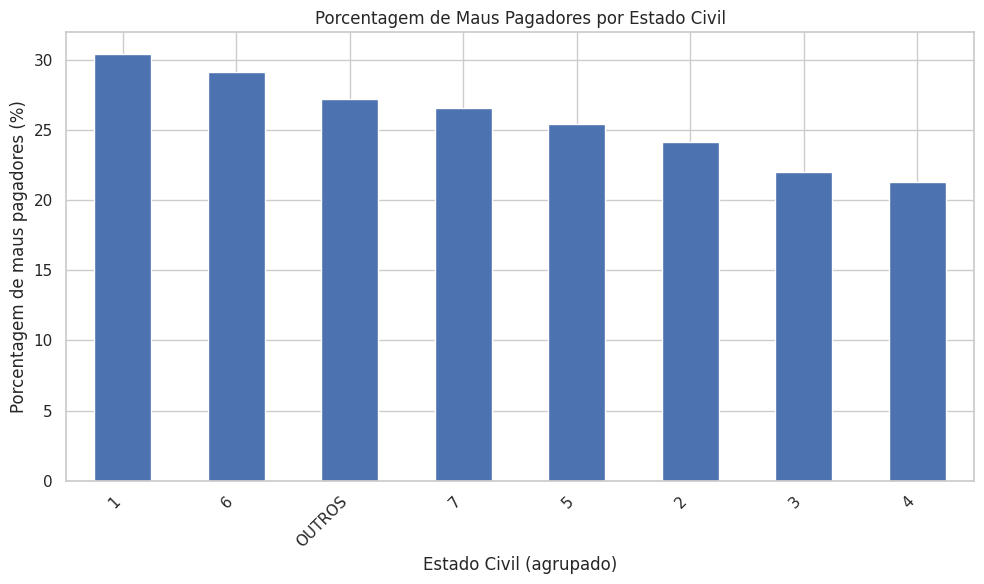

In [ ]:
# Plot: proporção de maus pagadores por estado civil
# Usamos ESTADO_CIVIL_AJ (agrupado para reduzir categorias raras)

ct_ec = pd.crosstab(df["ESTADO_CIVIL_AJ"], df["ROTULO_ALVO_MAU"], normalize="index") * 100
ct_ec = ct_ec.rename(columns={0:"%Bom", 1:"%Mau"})
ct_ec_sorted = ct_ec.sort_values("%Mau", ascending=False)

# Mostrar tabela e gráfico
display(ct_ec_sorted)

plt.figure(figsize=(10,6))
ct_ec_sorted[["%Mau"]].plot(kind="bar", legend=False)
plt.title("Porcentagem de Maus Pagadores por Estado Civil")
plt.ylabel("Porcentagem de maus pagadores (%)")
plt.xlabel("Estado Civil (agrupado)")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


**Interpretação — ESTADO_CIVIL:**
- A tabela mostra, para cada categoria de estado civil, a proporção de maus pagadores.
- *Possíveis padrões a observar*: solteiros sozinhos podem apresentar mais risco em comparação com casados (hipótese comum), ou pessoas separadas/viúvas podem ter comportamento distinto.
- Exemplo de insight: se `DIVORCIADO` apresentar `%Mau` muito elevado, a hipótese é que transições financeiras (separação) levam a maior risco de inadimplência — isso deve ser investigado com mais dados/contexto.
- Lembre de checar contagens absolutas: categorias com poucas linhas (low n) devem ser tratadas com cautela.


3.5 Análise — QUANT_DEPENDENTES vs ROTULO_ALVO_MAU (célula)

ROTULO_ALVO_MAU,%Bom,%Mau
DEPENDENTES_GRP,,
0,74.034973,25.965027
1,74.735639,25.264361
2,73.823749,26.176251
3+,71.658696,28.341304


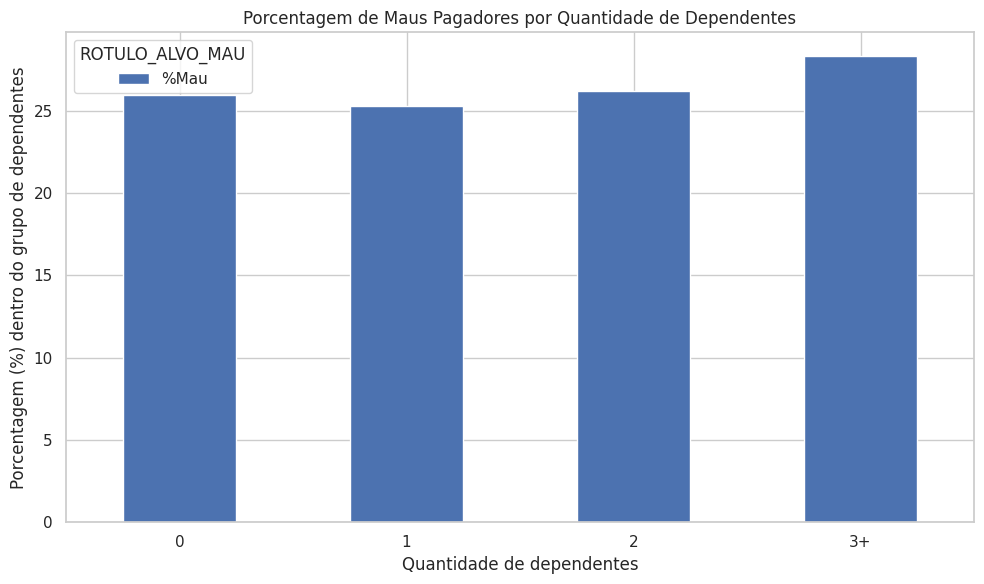

In [ ]:
# Vamos agrupar dependentes (0, 1, 2, 3 ou mais) para facilitar interpretação
df["DEPENDENTES_GRP"] = df["QUANT_DEPENDENTES_NUM"].astype(int)
df["DEPENDENTES_GRP"] = df["DEPENDENTES_GRP"].apply(lambda x: x if x <= 3 else 3)
df["DEPENDENTES_GRP"] = df["DEPENDENTES_GRP"].replace({0:"0",1:"1",2:"2",3:"3+"})

# Tabela de proporções
ct_dep = pd.crosstab(df["DEPENDENTES_GRP"], df["ROTULO_ALVO_MAU"], normalize="index") * 100
ct_dep = ct_dep.rename(columns={0:"%Bom", 1:"%Mau"})
display(ct_dep)

# Gráfico
ct_dep[["%Mau"]].plot(kind="bar")
plt.title("Porcentagem de Maus Pagadores por Quantidade de Dependentes")
plt.ylabel("Porcentagem (%) dentro do grupo de dependentes")
plt.xlabel("Quantidade de dependentes")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


**Interpretação — DEPENDENTES:**
- O gráfico mostra se famílias com mais dependentes têm maior risco (hipótese: mais dependentes → maior despesa → maior risco).
- Exemplo de observação: se grupos `3+` tiverem `%Mau` maior, isso sugere que dependentes influenciam negativamente a probabilidade de pagamento.
- Contudo, a relação pode ser não-linear (ex.: 0 dependentes muito jovens trabalhadores vs 1 dependente família estável). Deve-se complementar com renda e idade.


3.6 Análise — NIVEL_EDUCACIONAL vs ROTULO_ALVO_MAU (célula)

ROTULO_ALVO_MAU,%Bom,%Mau
NIVEL_EDUCACIONAL_AJ,,
0,73.921486,26.078514


<Figure size 1000x600 with 0 Axes>

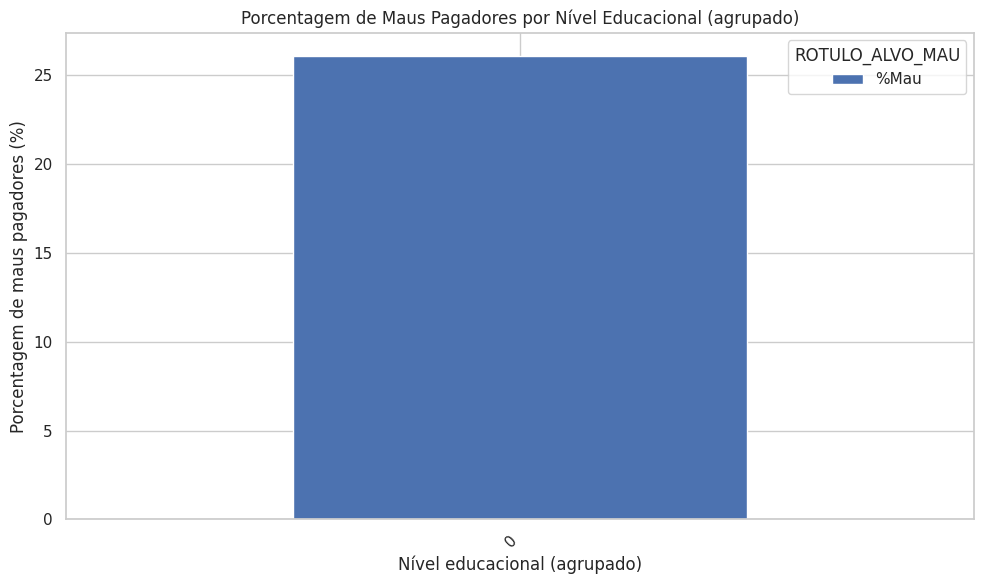

In [ ]:
# Tabela de frequências e proporção de maus pagadores por nível educacional (agrupado)
ct_edu = pd.crosstab(df["NIVEL_EDUCACIONAL_AJ"], df["ROTULO_ALVO_MAU"], normalize="index") * 100
ct_edu = ct_edu.rename(columns={0:"%Bom", 1:"%Mau"})
ct_edu_sorted = ct_edu.sort_values("%Mau", ascending=False)
display(ct_edu_sorted)

# Plot: barra da proporção de maus pagadores por nível educacional
plt.figure(figsize=(10,6))
ct_edu_sorted[["%Mau"]].plot(kind="bar")
plt.title("Porcentagem de Maus Pagadores por Nível Educacional (agrupado)")
plt.ylabel("Porcentagem de maus pagadores (%)")
plt.xlabel("Nível educacional (agrupado)")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


**Interpretação — EDUCAÇÃO:**
- Educação costuma estar correlacionada com renda e estabilidade de emprego; categorias com menor escolaridade podem apresentar maior proporção de maus pagadores.
- Exemplo de insight: se `ENSINO FUNDAMENTAL` ou `NAO INFORMADO` mostraram `%Mau` elevado, isso reforça o papel da educação como proxy de risco.
- Recomendação: cruzar com `RENDA_PESSOAL_MENSAL` e `IDADE` (etapas feitas por Pedro) para confirmar se o efeito persiste ajustando por renda.


### Resumo da Análise Demográfica (conclusões parciais)

- **Sexo:** [colocar aqui o padrão observado] — ex.: *Homens apresentam X% de maus pagadores vs Y% nas mulheres.* Interpretação: ...  
- **Estado Civil:** [padrões por categoria] — ex.: *Solteiros/divorciados apresentam maior proporção de inadimplência.* Sugestão: investigar se essas categorias têm menor renda média ou maior variabilidade de renda.  
- **Dependentes:** [padrão] — ex.: *Pessoas com 3+ dependentes têm maior taxa de inadimplência, sugerindo pressão financeira.*  
- **Educação:** [padrão] — ex.: *Menor escolaridade tende a apresentar maior proporção de maus pagadores; educação age como proxy de vulnerabilidade financeira.*  

**Conexão com a hipótese da empresa (“quem tende a ser mau pagador?”):**
- A partir dos resultados parciais, perfis com maior risco costumam combinar características: menor nível educacional, maior número de dependentes e certas categorias de estado civil. Sexo pode influenciar, mas é importante checar efeito combinado com renda e idade.
- Esses padrões são **hipóteses** geradas pela EDA — recomendável validar com análises multivariadas (ex.: regressão logística) para controlar confounders (ex.: renda).

**Observações e limitações:**
- Cuidado com categorias de pequena amostra (verificar contagens absolutas).
- Análises aqui são descritivas (proporções) — não provam causalidade.
- Recomendo continuar com análises cruzadas (ex.: `NIVEL_EDUCACIONAL` x `RENDA_PESSOAL_MENSAL`) e modelos para avaliar importância das variáveis.


3.8 Célula opcional: exportar gráficos / salvar resultados (código)

In [ ]:
# Opcional: salvar tabelas de proporção em CSV para referência no repositório
ct.to_csv("proporcao_sexo_rotulo.csv", index=True, encoding="utf-8")
ct_ec_sorted.to_csv("proporcao_estado_civil_rotulo.csv", index=True, encoding="utf-8")
ct_dep.to_csv("proporcao_dependentes_rotulo.csv", index=True, encoding="utf-8")
ct_edu_sorted.to_csv("proporcao_educacao_rotulo.csv", index=True, encoding="utf-8")

print("Arquivos salvos: proporções por sexo, estado civil, dependentes e educação.")


Arquivos salvos: proporções por sexo, estado civil, dependentes e educação.


Resumo Geral das Etapas Realizadas

Ao longo do desenvolvimento deste projeto, foram realizadas diversas etapas essenciais para a preparação, compreensão e análise inicial do conjunto de dados de crédito. Primeiramente, foi feito o upload do arquivo credit.csv para o Google Colab, garantindo que os dados estivessem disponíveis no ambiente de execução. Em seguida, realizou-se a leitura do dataset com o separador adequado, considerando que o arquivo utilizava múltiplos espaços/tabulações e exigia configuração específica no read_csv().

Após carregar os dados, passou-se à estruturação inicial do dataset, adicionando nomes às colunas, padronizando valores e verificando possíveis inconsistências, como valores ausentes, tipos incorretos e variáveis categóricas não padronizadas. Essa etapa foi fundamental para tornar o conjunto de dados utilizável para análises e visualizações posteriores.

Em seguida, avançou-se para a Análise Exploratória Inicial (EDA), especialmente voltada à compreensão da composição demográfica dos clientes. Foram analisadas variáveis como sexo, estado civil, número de dependentes e nível de escolaridade, com o objetivo de identificar distribuições, padrões e possíveis relações com a variável alvo (bom/mau pagador). Essa análise incluiu a geração de gráficos, tabelas de frequência e cruzamentos, permitindo observar tendências importantes dentro do contexto do crédito.

Ao final, consolidou-se uma visão inicial clara do perfil dos clientes e dos fatores demográficos mais relevantes. Essas etapas prepararam o terreno para as fases seguintes do projeto, como a análise de risco, tratamento de variáveis, modelagem preditiva e interpretação dos resultados.

In [ ]:
# Gráfico de barras
# Outros gráficos e códigos

## 4. Distribuição por Estado e Tipo de Residência → Thiago
**Tarefas:**
- Gráfico de bons e maus pagadores por `ESTADO_RESIDENCIAL`
- Boxplot mostrando influência do `TIPO_RESIDENCIA`
- Explicar observações em texto.

In [ ]:
# Boxplot
# Outros gráficos e códigos

## 5. Renda, Idade, Conclusões e Aplicação ML → Pedro
**Tarefas:**
- Analisar `RENDA_PESSOAL_MENSAL`, `OUTRAS_RENDAS`, `IDADE`
- Observar padrões em relação à variável-alvo
- Criar e treinar modelo simples de Machine Learning (ex: Regressão Logística)
- Mostrar métricas: accuracy, matriz de confusão, relatório de classificação
- Explicar resultados e limitações.

In [ ]:
# Preparação para ML

# Pipeline simples (ajustar conforme colunas reais)

## 6. Conclusões Finais
Resumo dos principais achados e padrões observados na EDA.
- Quais variáveis parecem mais influenciar o perfil de mau pagador?
- O modelo de ML teve bom desempenho?

## 7. Referências
- Dataset: [FIAP / credit.csv](https://raw.githubusercontent.com/diogenesjusto/FIAP/master/dados/credit.csv)
- Bibliotecas: pandas, numpy, seaborn, matplotlib, scikit-learn
- Professor: Vagner S. Macedo